> **Copyright &copy; 2020 CertifAI Sdn. Bhd.**<br>
 **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). \
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**> 

# 02 - AR is not Augmented Reality and MA is not Martial Arts

Authored by: [Kian Yang Lee](https://github.com/KianYang-Lee) - kianyang.lee@certifai.ai


## Notebook Description

This tutorial will showcase how to apply **autoregressive (AR)** and **moving average (MA)** model. An exercise section is attached for you to practice and hone your skills. Do make good use of it.

By the end of this tutorial, you will be able to:

1. Understand the fundamentals of AR and MA model
2. Understand and apply autocorrelation function (ACF) and partial correlation function (PACF)
3. Build and apply AR and MA model by choosing suitable parameters

## Notebook Outline
Below is the outline for this tutorial:
1. [Notebook Configurations](#configuration)
2. [Dataset](#dataset)
3. [Basic Analytics](#analytics)<br>
a.[Autocorrelation Function (ACF)](#acf)<br>
b.[Partial Autocorrelation Function (PACF)](#pacf)<br>
4. [Model Development](#model-dev) <br>
a.[Moving Average (MA) Model](#ma)<br>
b.[Autoregressive (AR) Model](#ar)
5. [Evaluation](#evaluation)
6. [Exercise](#exercise)
7. [Reference](#reference)
8. [Bonus](#bonus)



## <a name="configuration">Notebook Configurations</a>
Following are the modules that will be used for this tutorial. This notebook will heavily use `PyTorch` as they provide great APIs when for building deep learning models. You can find out more about them [here](https://pytorch.org/).

In [3]:
%matplotlib inline

import sys
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <a name="dataset">Dataset</a>
The dataset to be used for this tutorial will be generated randomly.

In [12]:
# reproducibility
np.random.seed(38)

# time component
time_steps = np.arange(100)

# data
noise = np.random.normal(loc=0, scale=6.5, size=len(time))
trend = time * 2.75
seasonality = 10 + np.sin(time * 0.25) * 20
generated_data = trend + seasonality + noise

## <a name="analytics">Basic Analytics</a>
Visualization is a great way to understand the data at our disposal. We will plot a time plot and package it into a function to save the trouble of writing repetitive codes.

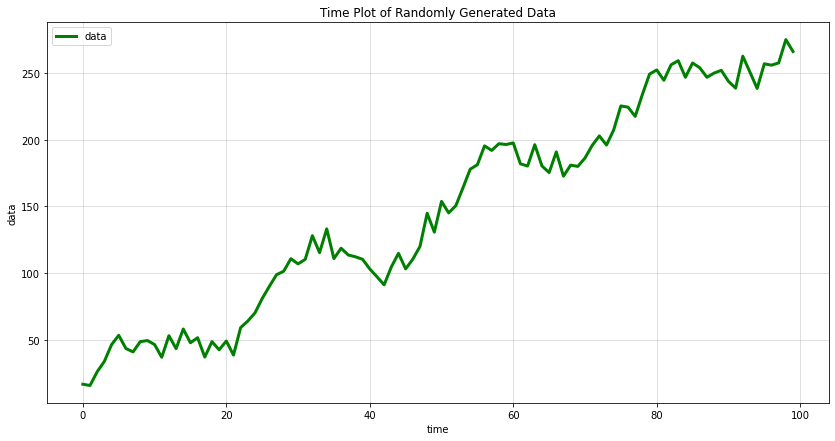

In [40]:
# generate time plot
def generate_time_plot(x1, y1, x2=None, y2=None, overlay=False, title="Time Plot", label2=None, xlabel="time", ylabel="data"):
    """
    Display a time plot of x1 versus y1 with the respective x-axis and y-axis labels.
    If overlay is True, x2 and y2 arguments need to be supplied to plot an overlay time plot.
    """
    plt.figure(figsize=(14,7))
    plt.plot(x1, y1, 'k-', label="data", color='green', linewidth=3)
    if overlay:
        plt.plot(x2, y2, 'b-', label=label2, color='red', linewidth=4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)
    plt.legend();
    
generate_time_plot(time_steps, generated_data, title="Time Plot of Randomly Generated Data")

We can also perform moving average smoothing to smoothen the plot. It is often used to smoothen the data by specifiying the window size. Generally, each moving average value will be the average of the points in the "moving window".

For this case, we will be using a window size of 5, 15 and 25 to show the effects of window size on smoothness of plot. In order to make use of the `rolling` method in `pandas`, we first need to convert our data into `pandas Series`. Also, we will start with using a window size of 3.

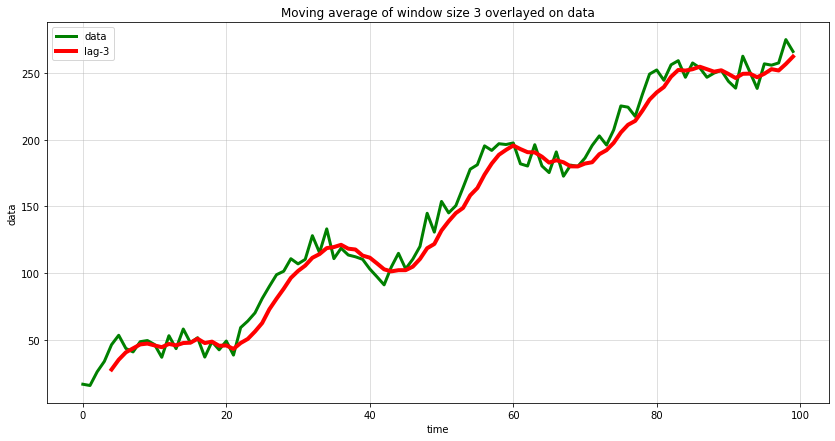

In [46]:
series_data = pd.Series(generated_data)

# case with lag of 3
series_lag_3 = series_data.rolling(window=5).mean()
generate_time_plot(time_steps, generated_data, time_steps, series_lag_3, overlay=True, 
                   title="Moving average of window size 3 overlayed on data", label2="lag-3")

Let's try using a window size of 15. Notice that the the shape of line.

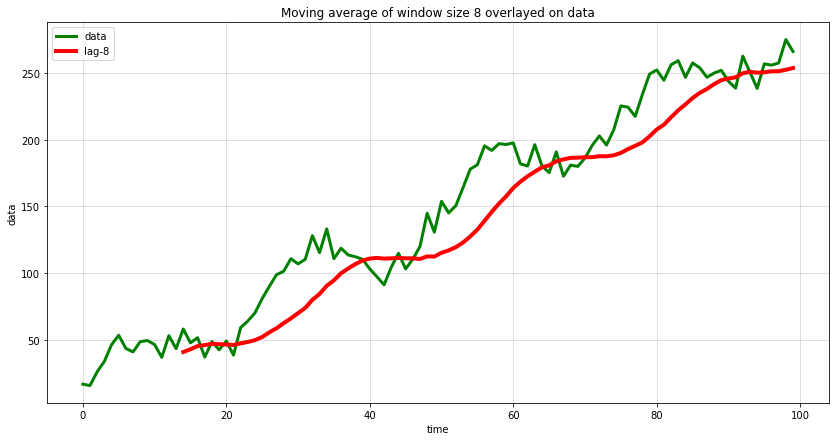

In [43]:
# case with lag of 8
series_lag_8 = series_data.rolling(window=15).mean()
generate_time_plot(time_steps, generated_data, time_steps, series_lag_8, overlay=True, 
                   title="Moving average of window size 8 overlayed on data", label2="lag-8")

Finally, try with a window size of 13. The line should lose most of its curviness at this time.

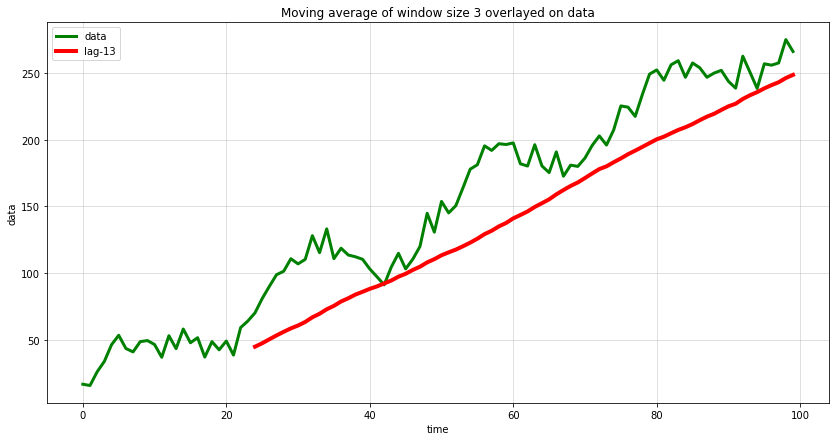

In [45]:
# case with lag of 13
series_lag_13 = series_data.rolling(window=25).mean()
generate_time_plot(time_steps, generated_data, time_steps, series_lag_13, overlay=True, 
                   title="Moving average of window size 3 overlayed on data", label2="lag-13")

We see that as the window size gets larger, the moving average becomes more and more smooth, at the expense of becoming less responsive to the fluctuations of the data. 

It is important to differentiate the difference between moving average smoothing (what we had just done) and moving average (MA) model. The difference lies in that moving average smoothing is more commonly used to estimate trend and seasonality of past data, while MA model is used to forecast future data by regressing on past forecast errors.

### <a name="acf">Autocorrelation Function (ACF)</a>
foo

### <a name="pacf">Partial Autocorrelation Function (PACF)</a>
foo

## <a name="model-dev">Model Development</a>
After performing some basic analytics on the dataset at hand, it's time to turn our attention to MA and AR model.

### <a name="ma">Moving Average (MA) Model</a>
We will be using `statsmodels` module extensively for building MA model. You can read more about the module [here](https://www.statsmodels.org/)

### <a name="ar">Autoregressive (AR) Model</a>
We will be using `statsmodels` module extensively for building AR model. You can read more about the module [here](https://www.statsmodels.org/)

In [10]:
# convert dtype to np.ndarray and reshaping it to 2D array
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

print(type(X_train_scaled))
print(type(X_test_scaled))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## <a name="evaluation">Evaluation</a>
Since this is a forecasting task, we will be using the following metrics for model evaluation:
* RMSE
* MAE

In [19]:
# using threshold to determine which prediction belongs to class 1 or 0
threshold = 0.5

# compute prediction results in the form of numpy ndarray
model.eval()
true_list, preds_list = [], []
for x_test, y_test in DataLoader(dataset=train_ds, batch_size=1, shuffle=False):
    with torch.no_grad():
        true_list.append(y_test.detach().numpy())
        preds = model(x_test)
        preds = torch.sigmoid(preds)
        preds_list.append(preds.detach().numpy())

train_true_np, train_preds_np = np.concatenate(true_list), np.concatenate(preds_list)

# compute evaluation metrics including ROC AUC score, accuracy score, f1-score, precision and recall
print("MODEL PERFORMANCE ON TRAINING DATASET")
print(f'\n\nROC AUC score: {round(roc_auc_score(train_true_np, train_preds_np), 3)}')
print(classification_report(y_true=train_true_np, y_pred=(train_preds_np > threshold).astype(int)))

MODEL PERFORMANCE ON TRAINING DATASET


ROC AUC score: 0.985
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     17501
         1.0       0.88      0.78      0.83      3100

    accuracy                           0.95     20601
   macro avg       0.92      0.88      0.90     20601
weighted avg       0.95      0.95      0.95     20601



In [20]:
# compute prediction results in the form of numpy ndarray
model.eval()
true_list, preds_list = [], []
for x_test, y_test in DataLoader(dataset=test_ds, batch_size=1, shuffle=False):
    with torch.no_grad():
        true_list.append(y_test.detach().numpy())
        preds = model(x_test)
        preds = torch.sigmoid(preds)
        preds_list.append(preds.detach().numpy())

test_true_np, test_preds_np = np.concatenate(true_list), np.concatenate(preds_list)

# compute evaluation metrics including ROC AUC score, accuracy score, f1-score, precision and recall
print("MODEL PERFORMANCE ON TEST DATASET")
print(f'\n\nROC AUC score: {round(roc_auc_score(test_true_np, test_preds_np), 3)}')
print(classification_report(y_true=test_true_np, y_pred=(test_preds_np > threshold).astype(int)))

MODEL PERFORMANCE ON TEST DATASET


ROC AUC score: 0.99
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     12734
         1.0       0.81      0.49      0.61       332

    accuracy                           0.98     13066
   macro avg       0.90      0.75      0.80     13066
weighted avg       0.98      0.98      0.98     13066



Well, our model has shows consistent performance for when tested on both training and test set. This shows that the model does not suffer from overfitting issue. Also, the accuracy score is quite satisfactory and shows no indication of underfitting. Nevertheless, the recall for class 1 is on the down side. This could be due to the imbalance class distribution that was found out earlier. You can try to improve the model performance by tackling the class imbalance issue, for example using undersampling or oversampling techinque. Next, we will be going into the exercise section.

## <a name="exercise">Exercise</a>

This exercise section is attached for you to practice and hone your skills. Try your best effort to complete it without referring to the solution.

### Notebook Configurations
You can import any module that you wish to use for this exercise. However, if you run the cells from the start of this notebook, most probably all the modules which you need had already been imported at this point.

In [21]:
# import modules
### BEGIN SOLUTION


### END SOLUTION

### Dataset
**INSTRUCTIONS**: Please perform binary classification task using the same dataset and features but instead choose the target variable of "label2". Feel free to experiment with other features or use feature engineering techniques.

In [39]:
# import training and test dataset
### BEGIN SOLUTION
df_train = pd.read_csv("../../datasets/predictive_maintenance/train.csv")
df_test = pd.read_csv("../../datasets/predictive_maintenance/test.csv")
### END SOLUTION

### Basic Analytics
**INSTRUCTIONS**: Perform some basic analytics on the dataset by following the guidelines that are provided in each cell.

In [40]:
# compute the number of rows and columns of train data
### BEGIN SOLUTION
df_train_shape = df_train.shape
df_train_rows = df_train.shape[0]
df_train_columns = df_train.shape[1]
### END SOLUTION

print(f"Shape of dataset is: {df_train_shape}")
print("Rows of train data are: " + str(df_train_rows))
print("Columns of train data are: " + str(df_train_columns))

Shape of dataset is: (20631, 30)
Rows of train data are: 20631
Columns of train data are: 30


In [41]:
# inspect first 5 rows of training data
### BEGIN SOLUTION
df_train.head()
### END SOLUTION

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,label1,label2
0,1,1,0.459770,0.166667,0,0,0.183735,0.406802,0.309757,0,1,0.726248,0.242424,0.109755,0,0.369048,0.633262,0.205882,0.199608,0.363986,0,0.333333,0,0,0.713178,0.724662,0.00000,191,0,0
1,1,2,0.609195,0.250000,0,0,0.283133,0.453019,0.352633,0,1,0.628019,0.212121,0.100242,0,0.380952,0.765458,0.279412,0.162813,0.411312,0,0.333333,0,0,0.666667,0.731014,0.00277,190,0,0
2,1,3,0.252874,0.750000,0,0,0.343373,0.369523,0.370527,0,1,0.710145,0.272727,0.140043,0,0.250000,0.795309,0.220588,0.171793,0.357445,0,0.166667,0,0,0.627907,0.621375,0.00554,189,0,0
3,1,4,0.540230,0.500000,0,0,0.343373,0.256159,0.331195,0,1,0.740741,0.318182,0.124518,0,0.166667,0.889126,0.294118,0.174889,0.166603,0,0.333333,0,0,0.573643,0.662386,0.00831,188,0,0
4,1,5,0.390805,0.333333,0,0,0.349398,0.257467,0.404625,0,1,0.668277,0.242424,0.149960,0,0.255952,0.746269,0.235294,0.174734,0.402078,0,0.416667,0,0,0.589147,0.704502,0.01108,187,0,0


In [42]:
# compute class distribution
### BEGIN SOLUTION
class_distribution = Counter(df_train["label2"])
### END SOLUTION

print('Classes in train dataset:', class_distribution)

Classes in train dataset: Counter({0: 17531, 2: 1600, 1: 1500})


In [43]:
# inspect missing values
### BEGIN SOLUTION
df_train.isna().sum()
### END SOLUTION

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            0
s10           0
s11           0
s12           0
s13           0
s14           0
s15           0
s16           0
s17           0
s18           0
s19           0
s20           0
s21           0
cycle_norm    0
RUL           0
label1        0
label2        0
dtype: int64

In [44]:
# removing the unnecessary columns
### BEGIN SOLUTION
drop_columns_list = ["setting3", "s1", "s5", "s10", "s16", "s18", "s19", "RUL", "label1"]
df_train_cleaned = df_train.drop(drop_columns_list, axis=1)
df_test_cleaned = df_test.drop(drop_columns_list, axis=1)
### END SOLUTION

In [45]:
# check for the data types
### BEGIN SOLUTION
df_train_cleaned.dtypes
### END SOLUTION

id              int64
cycle           int64
setting1      float64
setting2      float64
s2            float64
s3            float64
s4            float64
s6              int64
s7            float64
s8            float64
s9            float64
s11           float64
s12           float64
s13           float64
s14           float64
s15           float64
s17           float64
s20           float64
s21           float64
cycle_norm    float64
label2          int64
dtype: object

In [46]:
# separate out features and target variable
### BEGIN SOLUTION
y_train = df_train_cleaned['label2']
X_train = df_train_cleaned.drop('label2', axis=1)
y_test = df_test_cleaned['label2']
X_test = df_test_cleaned.drop('label2', axis=1)
### END SOLUTION

print('Shape for y of train dataset: ', y_train.shape)
print('Shape for x of train dataset: ', X_train.shape)
print('Shape for y of test dataset: ', y_test.shape)
print('Shape for x of test dataset: ', X_test.shape)

Shape for y of train dataset:  (20631,)
Shape for x of train dataset:  (20631, 20)
Shape for y of test dataset:  (13096,)
Shape for x of test dataset:  (13096, 20)


In [47]:
# data pre-processing : min-max normalization
### BEGIN SOLUTION
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
### END SOLUTION

### Model Development
**INSTRUCTIONS**: Prepare the input data and define your own LSTM model. Implement training and validation loop at each epoch.

In [49]:
# write a helper function which slices through the features using the sequence_length parameter and index the labe at the time step
# function should return features in sequence and labels
def sequencing_data(x_data, y_data, sequence_length):
    """
    Helper function to sample sub-sequence of training data.
    Input data must be numpy.
    """
    ### BEGIN SOLUTION
    x, y = [], []

    # Fill the batch with random sequences of data
    for i in range(x_data.shape[0] - sequence_length):

        # copy the sequences of data starting at this index
        x.append(x_data[i:i + sequence_length])
        y.append(y_data[i + sequence_length])
    ### END SOLUTION
    
    return x, y

# calling the helper function and store them in variables
### BEGIN SOLUTION
X_sequence_train, y_sequence_train = sequencing_data(X_train_scaled, y_train, 30)
X_sequence_test, y_sequence_test = sequencing_data(X_test_scaled, y_test, 30)
### END SOLUTION

# sanity check 
### BEGIN SOLUTION
print("Total samples for X train: " + str(len(X_sequence_train)))
print("Total samples for y train: " + str(len(y_sequence_train)))
print("Total samples for X test: " + str(len(X_sequence_test)))
print("Total samples for y test: " + str(len(y_sequence_test)))
### END SOLUTION

Total samples for X train: 20601
Total samples for y train: 20601
Total samples for X test: 13066
Total samples for y test: 13066


In [50]:
# write a customized Dataset class
class MaintenanceDataset(Dataset):
    """
    Convert input data into torch FloatTensor. 
    Inherit Dataset class. Return length of instance when len method is called and return specific sample
    of data when indexed.
    """    
    ### BEGIN SOLUTION
    def __init__(self, x, y):
        

        self.x = torch.FloatTensor(x)
        self.y = torch.tensor(y, dtype=torch.long)
        
    def __len__(self):
        return self.x.size(0)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    ### END SOLUTION

In [51]:
# instantiate Dataset object
### BEGIN SOLUTION
train_ds = MaintenanceDataset(X_sequence_train, y_sequence_train)
test_ds = MaintenanceDataset(X_sequence_test, y_sequence_test)
### END SOLUTION

In [52]:
# instantiate DataLoader object
### BEGIN SOLUTION
batch_size = 200
train_loader = DataLoader(dataset=train_ds,
                          batch_size=batch_size,
                          shuffle=False)

test_loader = DataLoader(dataset=test_ds,
                          batch_size=batch_size,
                          shuffle=False)

dataloaders = {'train': train_loader, 'test': test_loader}
### END SOLUTION

In [53]:
# defining model architecture
class LSTM(nn.Module):
    ### BEGIN SOLUTION
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__() 
        self.hidden_size = hidden_size 
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) 
        self.linear = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :] # we just using last time step to do prediction
        out = self.linear(out)
        return out
    ### END SOLUTION

# declaring number of layers, number of classes/output categories, input size and hidden size
### BEGIN SOLUTION
num_layers = 2       
num_classes = 3
input_size = 20      
hidden_size = 128 
### END SOLUTION

# instantiate LSTM object
### BEGIN SOLUTION
model = LSTM(input_size, hidden_size, num_layers, num_classes)
### END SOLUTION

print("Model architecture is: \n\n")
print(model)

Model architecture is: 


LSTM(
  (lstm): LSTM(20, 128, num_layers=2, batch_first=True)
  (linear): Linear(in_features=128, out_features=3, bias=True)
)


In [54]:
# set hyperparameters for model
### BEGIN SOLUTION
epochs = 5
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
### END SOLUTION

In [55]:
# implement model training and validation loop
### BEGIN SOLUTION
loss_score = {'train': [], 'test': []}
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        loss_cumsum = 0.0
        total_iterations = 0.0

        for i, (X, y) in enumerate(dataloaders[phase]):
            with torch.set_grad_enabled(phase == 'train'):
                out = model(X)
                loss = criterion(out, y)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            loss_cumsum += loss.item() * out.size(0)
            total_iterations += out.size(0)

        epoch_loss = loss_cumsum / total_iterations
        print(f'{phase.upper()} Loss: {epoch_loss}')
        loss_score[phase].append(epoch_loss)
### END SOLUTION

Epoch 1/5
TRAIN Loss: 0.45941058247825783
TEST Loss: 0.1088639573916421
Epoch 2/5
TRAIN Loss: 0.2637340652374705
TEST Loss: 0.07591222711797013
Epoch 3/5
TRAIN Loss: 0.22407696441690783
TEST Loss: 0.07100205205202151
Epoch 4/5
TRAIN Loss: 0.20225866780784107
TEST Loss: 0.06223658010022227
Epoch 5/5
TRAIN Loss: 0.1908676434359104
TEST Loss: 0.0537581698690736


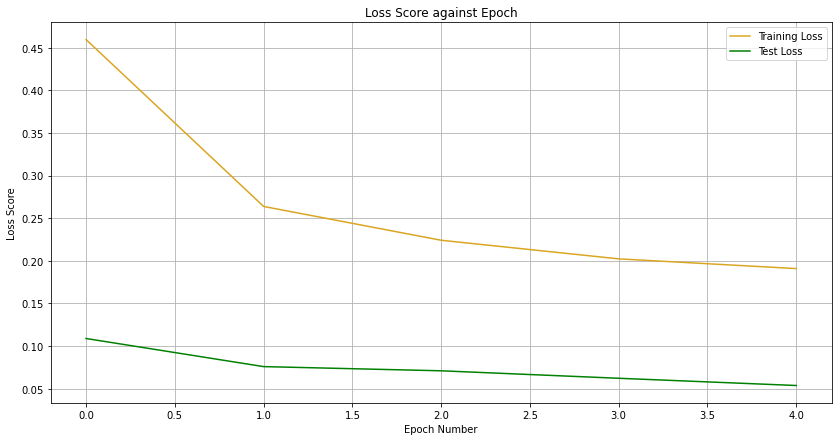

In [56]:
# plot loss score for training and validation loop
### BEGIN SOLUTION
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
ax.set_title("Loss Score against Epoch")
ax.grid(b=True)
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Loss Score")
ax.plot(loss_score['train'], color='goldenrod', label='Training Loss')
ax.plot(loss_score['test'], color='green', label='Test Loss')
ax.legend();
### END SOLUTION

### Evaluation
**INSTRUCTIONS:** Follow the guidelines given in the cells to evaluate performance of model.

In [57]:
# compute prediction results in the form of numpy ndarray and evaluation metrics including accuracy score, f1-score, precision and recall
# compute metric for model tested on both training and test set
### BEGIN SOLUTION
model.eval()
true_list, preds_list = [], []
for x_test, y_test in DataLoader(dataset=train_ds, batch_size=1, shuffle=False):
    with torch.no_grad():
        true_list.append(y_test.detach().numpy())
        preds = model(x_test)
        preds = torch.softmax(preds, dim=1)
        _, preds = torch.max(preds, dim=1)
        preds_list.append(preds.detach().numpy())

train_true_np, train_preds_np = np.concatenate(true_list), np.concatenate(preds_list)

print("MODEL PERFORMANCE ON TRAINING DATASET")
print(classification_report(y_true=train_true_np, y_pred=train_preds_np))

model.eval()
true_list, preds_list = [], []
for x_test, y_test in DataLoader(dataset=test_ds, batch_size=1, shuffle=False):
    with torch.no_grad():
        true_list.append(y_test.detach().numpy())
        preds = model(x_test)
        preds = torch.softmax(preds, dim=1)
        _, preds = torch.max(preds, dim=1)
        preds_list.append(preds.detach().numpy())

test_true_np, test_preds_np = np.concatenate(true_list), np.concatenate(preds_list)

print("MODEL PERFORMANCE ON TEST DATASET")
print(classification_report(y_true=test_true_np, y_pred=test_preds_np))
### END SOLUTION

MODEL PERFORMANCE ON TRAINING DATASET
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17501
           1       0.63      0.47      0.54      1500
           2       0.75      0.95      0.84      1600

    accuracy                           0.94     20601
   macro avg       0.79      0.80      0.79     20601
weighted avg       0.93      0.94      0.93     20601

MODEL PERFORMANCE ON TEST DATASET
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12734
           1       0.63      0.42      0.51       272
           2       0.43      0.78      0.56        60

    accuracy                           0.98     13066
   macro avg       0.68      0.73      0.69     13066
weighted avg       0.98      0.98      0.98     13066



## <a name="reference">Reference</a>:
1. [Deep Learning for tabular data using Pytorch](https://jovian.ai/aakanksha-ns/shelter-outcome)
2. [pytorch custom dataset: DataLoader returns a list of tensors rather than tensor of a list](https://stackoverflow.com/questions/62208904/pytorch-custom-dataset-dataloader-returns-a-list-of-tensors-rather-than-tensor)
3. [Predictive maintenance - NASA Turbofan Dataset](https://www.kaggle.com/c/predictive-maintenance)
4. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

## <a name="bonus">Bonus</a>
We can also just load one batch of DataLoader as checking, by converting DataLoader to iterator and calling `next` method

In [ ]:
next(iter(train_loader))